### Importación de datos



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#1. Análisis de facturación



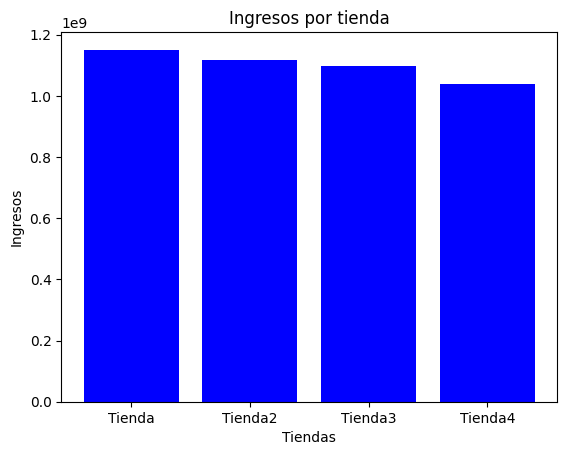

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Siguiendo los datos disponibles en trello, sumé las columnas de precios de cada tienda.

ingresos = {
    'Tienda': tienda['Precio'].sum(),
    'Tienda2': tienda2['Precio'].sum(),
    'Tienda3': tienda3['Precio'].sum(),
    'Tienda4': tienda4['Precio'].sum()
}

#Grafiqué la sumatoria de precios de cada tienda para comparar sus ventas:

plt.bar(ingresos.keys(), ingresos.values(), color='blue')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por tienda')
plt.show()



**Conclusión de esta etapa:**
La tienda 1 tiene más ingresos que todas las demás tiendas, sin embargo este dato no supone que sea la tienda más redituable. Para saberlo es necesario continuar el análisis de datos.

# 2. Ventas por categoría

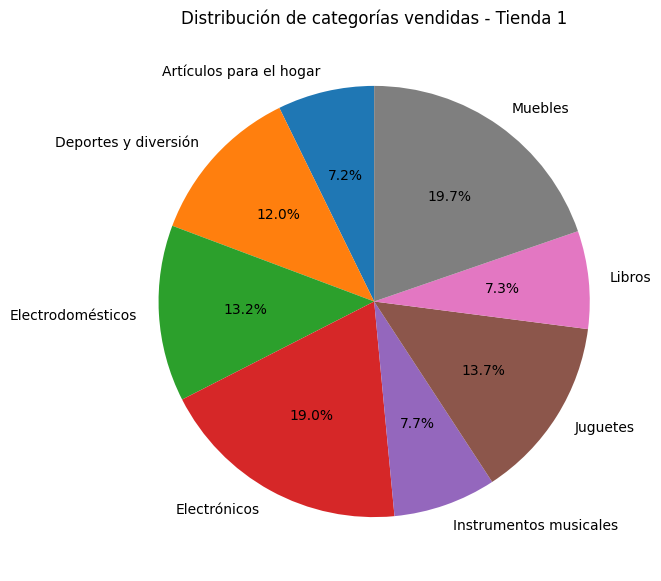

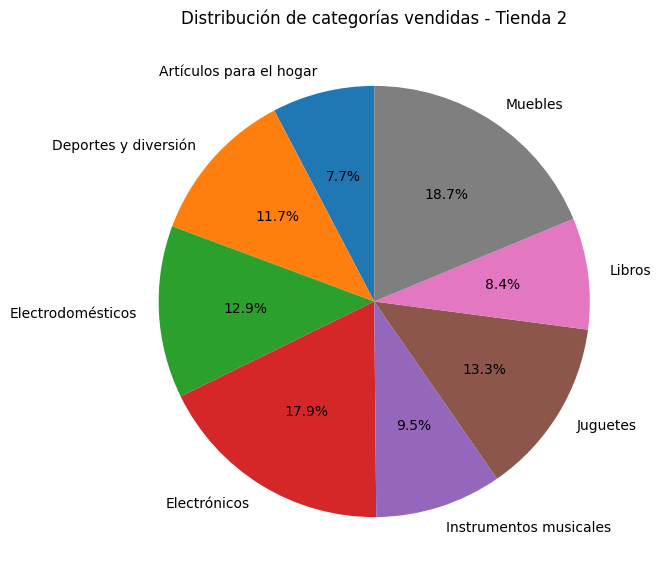

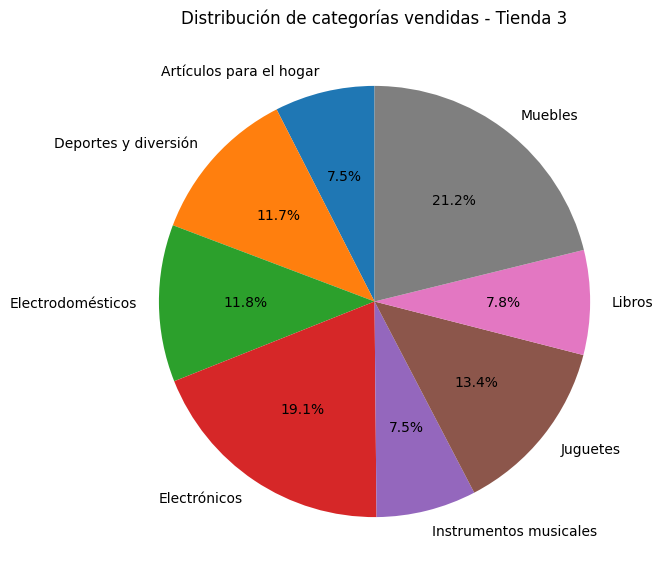

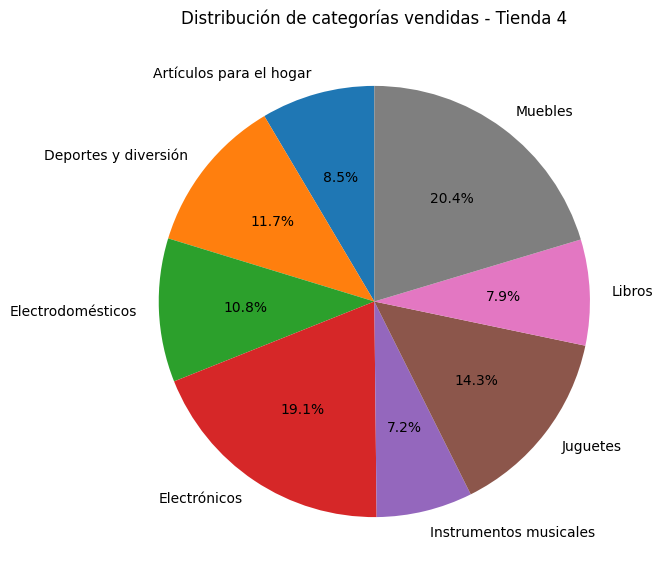

Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Tienda 4:
Categoría del Producto
Muebles                    480
Electrónicos

In [10]:
# Agrupar y contar categorías por tienda:

categorias_tienda1= tienda.groupby('Categoría del Producto').size()
categorias_tienda2=tienda2.groupby('Categoría del Producto').size()
categorias_tienda3=tienda3.groupby('Categoría del Producto').size()
categorias_tienda4=tienda4.groupby('Categoría del Producto').size()

#Encontrar la categoría más vendida en cada tienda y el número:
categoria_top1 = categorias_tienda1.idxmax()
cantidad_top1 = categorias_tienda1.max()

categoria_top2=categorias_tienda2.idxmax()
cantidad_top2=categorias_tienda2.max()

categoria_top3=categorias_tienda3.idxmax()
cantidad_top3=categorias_tienda3.max()

categoria_top4=categorias_tienda4.idxmax()
cantidad_top4=categorias_tienda4.max()

#Gráfico de las categorías:
# Obtener la categoría más vendida y su cantidad para cada tienda
top_categorias = []
cantidades = []
nombres_tiendas = ['Tienda', 'Tienda2', 'Tienda3', 'Tienda4']

for df in [tienda, tienda2, tienda3, tienda4]:
    conteo = df['Categoría del Producto'].value_counts()
    top_categorias.append(conteo.idxmax())
    cantidades.append(conteo.max())

# Crear gráfico de las 4 tiendas:


# Gráfico circular para tienda 1:
plt.figure(figsize=(7, 7))
categorias_tienda1.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de categorías vendidas - Tienda 1')
plt.ylabel('')
plt.show()



# Gráfico circular para tienda 2:
plt.figure(figsize=(7, 7))
categorias_tienda2.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de categorías vendidas - Tienda 2')
plt.ylabel('')
plt.show()


# Gráfico circular para tienda 3:
plt.figure(figsize=(7, 7))
categorias_tienda3.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de categorías vendidas - Tienda 3')
plt.ylabel('')
plt.show()

# Gráfico circular para tienda 4:
plt.figure(figsize=(7, 7))
categorias_tienda4.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de categorías vendidas - Tienda 4')
plt.ylabel('')  # Para ocultar el label del eje Y
plt.show()





#Además imprimí los resultados de cada categoría para corroborar que los datos y el gráfico son correctos.

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i}:")
    print(df['Categoría del Producto'].value_counts())
    print()






**Conclusiones de esta etapa:**
La categoría más vendida en las cuatro tiendas fue "Muebles". Siendo la tienda 3 la que más elementos vendió de esa categoría (499), seguida de la tienda 4 (480), la tienda 1 (465) y por último la tienda 2 (442).



# 3. Calificación promedio de la tienda


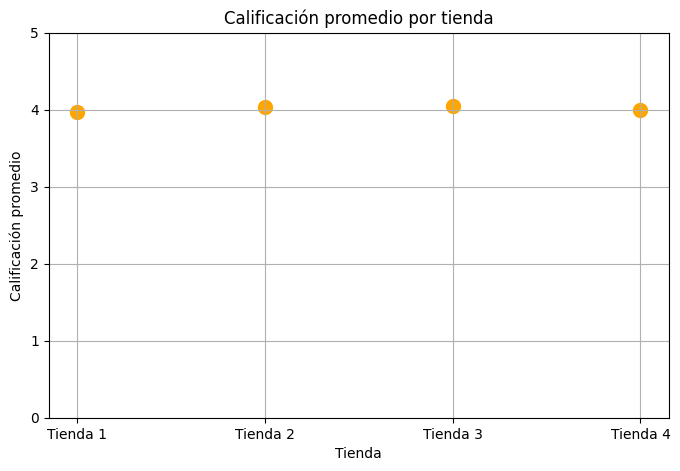

In [11]:
#Creé un array para almacenar los promedios:
promedios = []

#Utilicé un ciclo for para recorrer todas las tiendas usando .mean para calcular los promedios y .append para guardar los resultados en el arrray promedios:
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
  promedio =df['Calificación'].mean()
  promedios.append(promedio)
#Gráfico de dispersión:

# Lista de nombres para el eje X:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.figure(figsize=(8, 5))
plt.scatter(nombres_tiendas, promedios, color='orange', s=100)
plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.ylim(0, 5)  # Escala de 0 a 5
plt.grid(True)
plt.show()



**Conclusiones de esta etapa:** En el gráfico se puede observar que el promedio de valoración de las tiendas es 4.01, teniendo en cuenta que la calificación del cliente va de 1 a 5, es una calficación muy buena, las tiendas mejor calificadas son las tiendas 3 con 4.05 y la tienda 2 con 4.04 siendo la tineda 1 la peor rankeada con 3.98 estando incluso por debajo del promedio de calificaciones general de la empresa, este punto es muy significativo en nuestro análisis de tiendas ya que la satisfacción del cliente engloba muchos items a tener en cuenta como la entrega y el estado en el que el cliente recibe el producto, asi también como la atención brindada en la tienda.

# 4. Productos más y menos vendidos

In [6]:
#Para optimizar el código, cree dos arreglos para recorrer las tiendas con un ciclo for y nombrar las mismas:
tiendas=[tienda,tienda2,tienda3,tienda4]
nombre_tiendas=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i,df in enumerate(tiendas):
  productos = df['Producto'].value_counts()

#Productos más vendidos y menos vendidos por tienda:
  producto_mas_vendido=productos.idxmax()
  cantidad_mas_vendida=productos.max()

  producto_menos_vendido=productos.idxmin()
  cantidad_menos_vendida=productos.min()

  print(f"\n🔹 {nombres_tiendas[i]}")
  print(f"Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendida} ventas)")
  print(f"Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendida} ventas)")







🔹 Tienda
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

🔹 Tienda2
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

🔹 Tienda3
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

🔹 Tienda4
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

📦 Promedio de costo de envío por tienda:

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


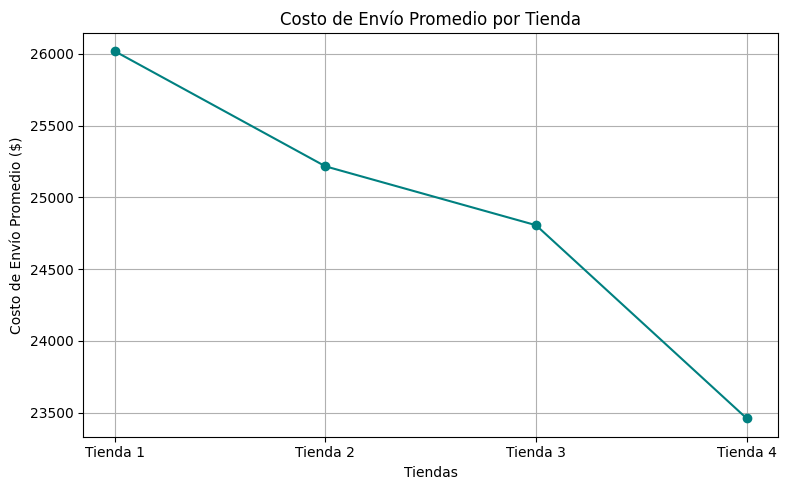

In [12]:

tiendas = [tienda, tienda2, tienda3, tienda4]
nombre_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_envio = []

print("📦 Promedio de costo de envío por tienda:\n")

for i, df in enumerate(tiendas):
    promedio_envio = df['Costo de envío'].mean()
    promedios_envio.append(promedio_envio)
    print(f"{nombre_tiendas[i]}: ${promedio_envio:.2f}")

# Crear el gráfico de líneas
plt.figure(figsize=(8,5))
plt.plot(nombre_tiendas, promedios_envio, marker='o', linestyle='-', color='teal')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio ($)')
plt.grid(True)
plt.tight_layout()
plt.show()






# **Informe final**

**Introducción**
El presente informe tiene como objetivo asistir al Sr. Juan en la toma de decisiones respecto a cuál de sus cuatro tiendas de la cadena Alura Store debería vender para iniciar un nuevo emprendimiento. Para ello, se realizó un análisis detallado de diversos factores clave: ingresos totales, productos y categorías más vendidos, calificación promedio de los clientes y costo de envío de cada tienda. Los resultados fueron visualizados a través de diferentes tipos de gráficos para facilitar la comparación entre tiendas.


---



# Desarrollo del Análisis
 1. Ingresos Totales
Al analizar la facturación de cada tienda, se evidenció que Tienda 1 es la que más ingresos genera. Este es un punto a favor para la tienda 1 pero no significa que sea la tienda más exitosa o conveniente, hay muchos más factores a analizar, si podemos asumir que la tienda tiene más ganancias que las demás, pero ¿que significa esto? Si tomaramos este único punto de análisis, concluiriamos que no debe ser vendida, sin embargo una tienda que tiene menos ganancias también puede ser una que tenga menos pérdidas, y que, en contraste, sea más rentable a largo plazo.

2. Categorías y Productos Vendidos
Las cuatro tiendas presentan categorías y productos destacados. Sin embargo, ninguna tienda mostró una diferencia lo suficientemente significativa como para determinar una ventaja competitiva clara en este aspecto. En todas se observó cierta consistencia entre los productos más y menos vendidos, sin variaciones extremas.

3. Calificación Promedio de Clientes
Este fue un factor determinante: Tienda 1 obtuvo la peor calificación promedio entre todas las tiendas. La baja satisfacción del cliente puede ser reflejo de diversos problemas en la atención, la calidad del producto o la logística, lo cual compromete la fidelización y la sostenibilidad de la tienda a largo plazo. La opinión del cliente es muy importante a la hora de definir qué tienda es conveniente vender, y nos da un panorama detallado de la calidad del servicio que brinda la misma. Considerando además que la Tienda 1 está por debajo del promedio de satisfacción de todas las tiendas, que es 4.01.

4. Costo de Envío Promedio
Tienda 1 también posee el mayor costo promedio de envío. Esto representa una desventaja competitiva, ya que puede afectar la percepción del cliente y desincentivar futuras compras, especialmente en comparación con tiendas que ofrecen envíos más económicos.



---



# Conclusión
A pesar de que Tienda 1 es la que más ingresos genera actualmente, presenta debilidades importantes en áreas fundamentales para el mantenimiento de un negocio saludable a largo plazo: satisfacción del cliente y eficiencia logística. La combinación de baja calificación de usuarios y altos costos de envío hacen de esta tienda la menos eficiente del grupo.

Por lo tanto, se recomienda que el Sr. Juan considere vender la Tienda 1. Esta decisión prioriza la sostenibilidad, la reputación del negocio y el potencial de crecimiento de las tiendas restantes